In [1]:
#Imports
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import plot_roc_curve, auc, roc_curve
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
#Import the data after preprocessing
training = pd.read_csv("training.csv").iloc[:,1:]
validation = pd.read_csv("validation.csv").iloc[:,1:]
test = pd.read_csv("test.csv").iloc[:,1:]

#logistic regression model
lr_model = LogisticRegression()

#Split the data into X and y, input and output features
x_train = training.iloc[:,:-1]
y_train = training.iloc[:,-1:]

x_valid = validation.iloc[:,:-1]
y_valid = validation.iloc[:,-1:]

x_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1:]

print("Training set: ")
print(x_train.shape)
print(y_train.shape)
print(Counter(y_train.iloc[:,0]),"\n")

print("Validation set: ")
print(x_valid.shape)
print(y_valid.shape)
print(Counter(y_valid.iloc[:,0]),"\n")

print("Test set: ")
print(x_test.shape)
print(y_test.shape)
print(Counter(y_test.iloc[:,0]),"\n")

Training set: 
(173, 25)
(173, 1)
Counter({0: 110, 1: 63}) 

Validation set: 
(43, 25)
(43, 1)
Counter({0: 27, 1: 16}) 

Test set: 
(73, 25)
(73, 1)
Counter({0: 47, 1: 26}) 



In [2]:
#fit the model with data
lr_model.fit(x_train, y_train.squeeze())
print(lr_model)

LogisticRegression()


In [3]:
#model pred
y_pred = lr_model.predict(x_valid)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1])

In [4]:
#import the metrics class
from sklearn import metrics
cnf_mrx = metrics.confusion_matrix(y_valid, y_pred)
cnf_mrx

array([[25,  2],
       [ 7,  9]])

Text(0.5, 257.44, 'Predicted label')

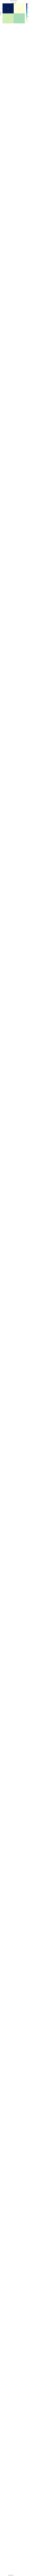

In [5]:
#visualizing confusion maxrix using heatmap

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_mrx), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.text(0.5, 257.44, 'Predicted label')

In [6]:
#Report
target_names = ['0', '1']
print(classification_report(y_valid, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        27
           1       0.82      0.56      0.67        16

    accuracy                           0.79        43
   macro avg       0.80      0.74      0.76        43
weighted avg       0.79      0.79      0.78        43



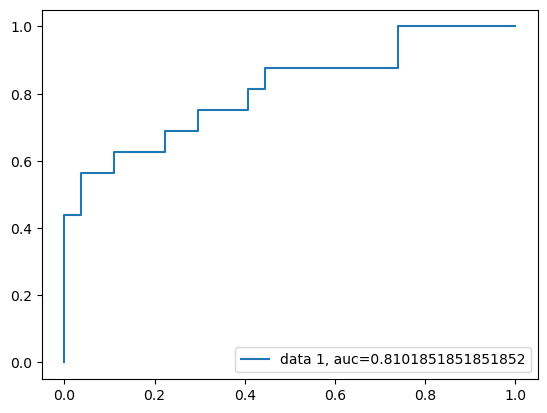

In [7]:
#ROC Curve
y_pred_proba = lr_model.predict_proba(x_valid)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_valid,  y_pred_proba)
auc = metrics.roc_auc_score(y_valid, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [8]:
####
#To find the best value
import numpy as np
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
std_slc = StandardScaler()
lr_model = linear_model.LogisticRegression()

pipe = Pipeline(steps=[('lr_model', lr_model)])

In [9]:
#n_components = list(range(1,X.shape[1]+1,1))
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']

In [10]:
parameters = dict(lr_model__C=C,
                      lr_model__penalty=penalty)

In [11]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(x_train, y_train)

/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATI

/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
250 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with

GridSearchCV(estimator=Pipeline(steps=[('lr_model', LogisticRegression())]),
             param_grid={'lr_model__C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4....
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'lr_model__penalty': ['l1', 'l2']})

In [12]:
print('Best Penalty:', clf_GS.best_estimator_.get_params()['lr_model__penalty'])
print('Best C:', clf_GS.best_estimator_.get_params()['lr_model__C'])
#print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['lr_model'])

Best Penalty: l2
Best C: 0.05963623316594643

LogisticRegression(C=0.05963623316594643)


In [13]:
#using hyperparameters from gridsearch and manually trying new hyperparameters on the
#validationset
lr = LogisticRegression(C=0.05963623316594643, penalty="l2", solver="lbfgs")
lr.fit(x_train, y_train)
y_pred = lr.predict(x_valid)

/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
cnf_mrx = metrics.confusion_matrix(y_valid, y_pred)
cnf_mrx

array([[26,  1],
       [ 7,  9]])

Text(0.5, 257.44, 'Predicted label')

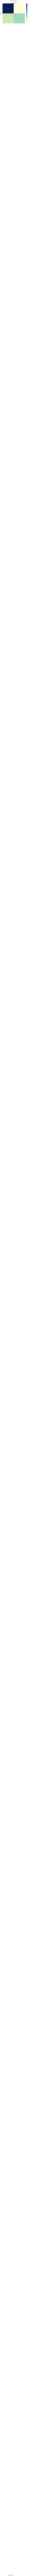

In [15]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_mrx), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.text(0.5, 257.44, 'Predicted label')

In [16]:
target_names = ['0', '1']
print(classification_report(y_valid, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87        27
           1       0.90      0.56      0.69        16

    accuracy                           0.81        43
   macro avg       0.84      0.76      0.78        43
weighted avg       0.83      0.81      0.80        43



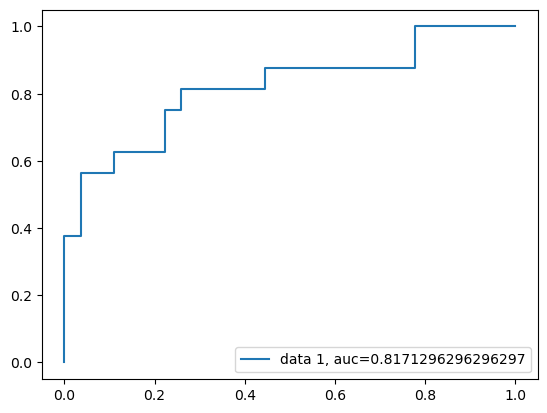

In [17]:
y_pred_proba = lr.predict_proba(x_valid)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_valid,  y_pred_proba)
auc = metrics.roc_auc_score(y_valid, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [18]:
x_train_valid = pd.concat([x_train, x_valid])
y_train_valid = pd.concat([y_train, y_valid])

In [19]:
lr_best = LogisticRegression(C=0.05963623316594643, penalty="l2", solver="lbfgs")
lr_best.fit(x_train_valid, y_train_valid)
y_pred = lr.predict(x_test)

/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
cnf_mrx = metrics.confusion_matrix(y_test, y_pred)
cnf_mrx

array([[43,  4],
       [ 5, 21]])

Text(0.5, 257.44, 'Predicted label')

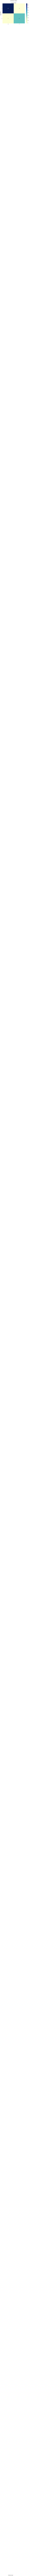

In [21]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_mrx), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.text(0.5, 257.44, 'Predicted label')

In [22]:
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91        47
           1       0.84      0.81      0.82        26

    accuracy                           0.88        73
   macro avg       0.87      0.86      0.86        73
weighted avg       0.88      0.88      0.88        73



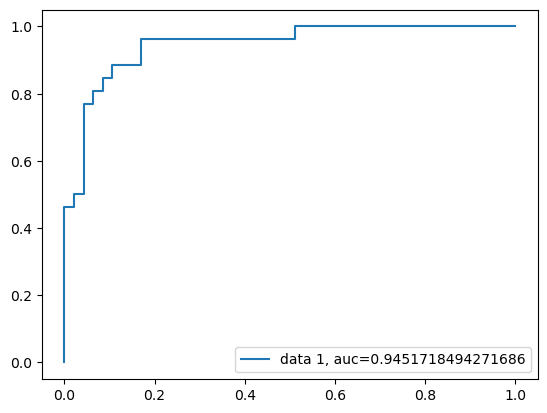

In [23]:
y_pred_proba = lr_best.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [24]:
#From this line
#Some mistakes that I made


#GridSearchCV
logistic_params = {
    "penalty":["l1", "l2", "elasticent", "none"],
    "C": [10, 1.0, 0.1, 0.2, 0.05, 0.5],
    "solver":["saga", "sag", "liblinear", "newton-cg", "lbfgs"],
    "max_iter":[100, 1000, 10000]
}
logistic = LogisticRegression()
tuned_logistic = GridSearchCV(estimator = logistic, param_grid =logistic_params, scoring = "accuracy", n_jobs=-1)
tuned_logistic.fit(x_train, y_train.squeeze())
logisticParams = tuned_logistic.best_params_
print(logisticParams)

/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn

/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn

/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWar

/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale

/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn

/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}


/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn

In [25]:
X = validation.iloc[:,:-1]
y = validation.iloc[:,-1:]

In [26]:
#After getting the best value of C,
#re-fitting the model on the validation set
lr_best_c = LogisticRegression(penalty='l2', max_iter=100, solver='saga', C = 0.1)
fitted = lr_best_c.fit(x_train, y_train.squeeze())
print(lr_best_c)

LogisticRegression(C=0.1, solver='saga')


In [27]:
y_pred = lr_best_c.predict(x_valid)
cnf_mrxC = metrics.confusion_matrix(y_valid, y_pred)
cnf_mrxC

array([[25,  2],
       [ 7,  9]])

Text(0.5, 257.44, 'Predicted label')

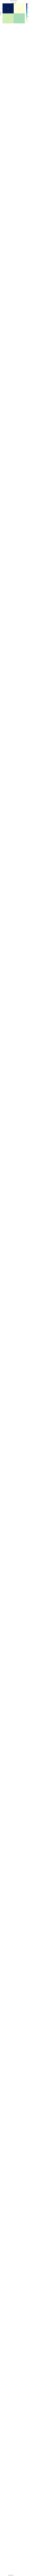

In [28]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_mrxC), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.text(0.5, 257.44, 'Predicted label')

In [29]:
target_names = ['without heartdisease', 'with heartdisease']
print(classification_report(y_valid, y_pred, target_names=target_names))

                      precision    recall  f1-score   support

without heartdisease       0.78      0.93      0.85        27
   with heartdisease       0.82      0.56      0.67        16

            accuracy                           0.79        43
           macro avg       0.80      0.74      0.76        43
        weighted avg       0.79      0.79      0.78        43



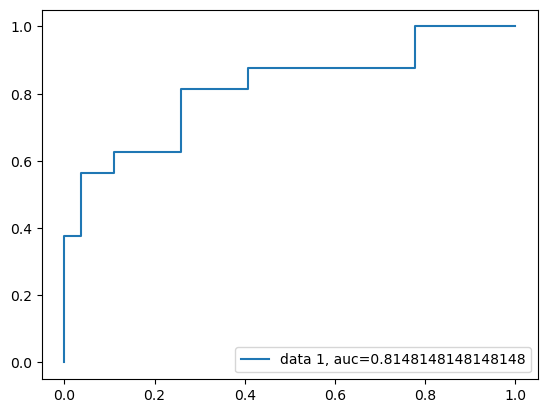

In [30]:
y_pred_proba = lr_best_c.predict_proba(x_valid)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_valid, y_pred_proba)
auc = metrics.roc_auc_score(y_valid, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [31]:
#Assigning hyperparameters that we found manually
lr_best_c = LogisticRegression(penalty='l2', max_iter=100, solver='liblinear', C = 1.0)

In [32]:
fitted = lr_best_c.fit(pd.concat([x_train, x_valid]), pd.concat([y_train, y_valid]))

/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
#Concetanation
pd.concat([x_train, x_valid])
print(pd.concat([x_train, x_valid]))
pd.concat([y_train, y_valid])

         age  sex  painloc  painexer  relrest        cp  trestbps  htn  \
0   0.368421    1        1         0        1  0.666667  0.259259    0   
1   0.421053    1        1         0        0  0.333333  0.351852    1   
2   0.631579    0        1         0        0  0.666667  0.305556    1   
3   0.684211    0        1         0        0  0.333333  0.537037    1   
4   0.500000    1        1         1        1  1.000000  0.444444    1   
..       ...  ...      ...       ...      ...       ...       ...  ...   
38  0.473684    1        1         1        1  1.000000  0.814815    1   
39  0.263158    1        1         0        0  0.333333  0.444444    0   
40  0.342105    1        1         1        1  1.000000  0.166667    0   
41  0.315789    1        1         0        0  0.333333  0.351852    1   
42  0.631579    0        1         1        1  1.000000  0.351852    0   

        chol  fbs  ...    met   thalach  thalrest  tpeakbps  tpeakbpd  \
0   0.276062    0  ...  0.625  0.64814

,num
0,0
1,0
2,0
3,0
4,0
...,...
38,0
39,0
40,1
41,0


In [34]:
y_pred = lr_best_c.predict(x_test)
cnf_mrxT = metrics.confusion_matrix(y_test, y_pred)
cnf_mrxT

array([[42,  5],
       [ 3, 23]])

Text(0.5, 257.44, 'Predicted label')

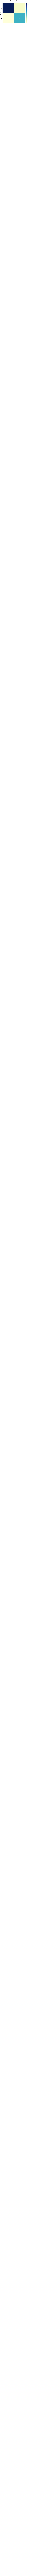

In [35]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_mrxT), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.text(0.5, 257.44, 'Predicted label')

In [36]:
target_names = ['without heartdisease', 'with heartdisease']
print(classification_report(y_test, y_pred, target_names=target_names))

                      precision    recall  f1-score   support

without heartdisease       0.93      0.89      0.91        47
   with heartdisease       0.82      0.88      0.85        26

            accuracy                           0.89        73
           macro avg       0.88      0.89      0.88        73
        weighted avg       0.89      0.89      0.89        73



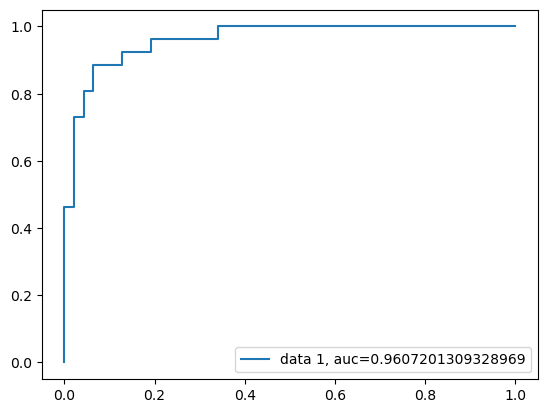

In [37]:
y_pred_proba = lr_best_c.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [38]:
#For confusion matrix used in comparison section
#Bulding KNN model we implemented
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(leaf_size=1, metric="manhattan", n_neighbors=15, weights="uniform")

In [39]:
#Concetanation
import pandas as pd
pd.concat([x_train, x_valid])
print(pd.concat([x_train, x_valid]))
pd.concat([y_train, y_valid])

         age  sex  painloc  painexer  relrest        cp  trestbps  htn  \
0   0.368421    1        1         0        1  0.666667  0.259259    0   
1   0.421053    1        1         0        0  0.333333  0.351852    1   
2   0.631579    0        1         0        0  0.666667  0.305556    1   
3   0.684211    0        1         0        0  0.333333  0.537037    1   
4   0.500000    1        1         1        1  1.000000  0.444444    1   
..       ...  ...      ...       ...      ...       ...       ...  ...   
38  0.473684    1        1         1        1  1.000000  0.814815    1   
39  0.263158    1        1         0        0  0.333333  0.444444    0   
40  0.342105    1        1         1        1  1.000000  0.166667    0   
41  0.315789    1        1         0        0  0.333333  0.351852    1   
42  0.631579    0        1         1        1  1.000000  0.351852    0   

        chol  fbs  ...    met   thalach  thalrest  tpeakbps  tpeakbpd  \
0   0.276062    0  ...  0.625  0.64814

,num
0,0
1,0
2,0
3,0
4,0
...,...
38,0
39,0
40,1
41,0


In [40]:
x_train_valid = pd.concat([x_train, x_valid])
y_train_valid = pd.concat([y_train, y_valid])

In [41]:
model.fit(x_train_valid, y_train_valid)

/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(leaf_size=1, metric='manhattan', n_neighbors=15)

In [42]:
#pred
y_pred = model.predict(x_test)

/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Text(0.5, 257.44, 'Predicted label')

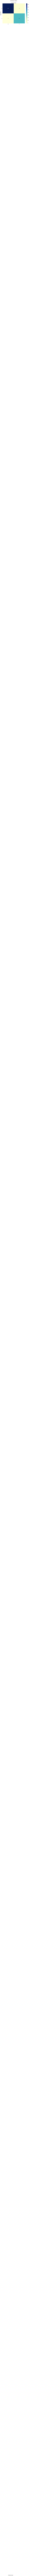

In [43]:
#import the metrics class
from sklearn import metrics
cnf_mrx = metrics.confusion_matrix(y_test, y_pred)
#cnf_mrx
#Confusion matrix for KNN and Ensemble stacking
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_mrx), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.text(0.5, 257.44, 'Predicted label')

In [44]:
#Buliding a stacking model that we used
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

In [45]:
base_learners = {
    "kNN": KNeighborsClassifier(metric = "euclidean",n_neighbors=5),
    "logistic": LogisticRegression(penalty="l2",solver="newton-cg"),
    "forest": RandomForestClassifier(criterion="gini", n_estimators=100, random_state=21)
}

In [46]:
lvl1 = LogisticRegression()
lvl0 = []
for i in base_learners.keys():
    lvl0.append((i,base_learners[i]))

model = StackingClassifier(estimators = lvl0, final_estimator =  lvl1, cv=5)

In [47]:
#Concetanation
import pandas as pd
pd.concat([x_train, x_valid])
print(pd.concat([x_train, x_valid]))
pd.concat([y_train, y_valid])

         age  sex  painloc  painexer  relrest        cp  trestbps  htn  \
0   0.368421    1        1         0        1  0.666667  0.259259    0   
1   0.421053    1        1         0        0  0.333333  0.351852    1   
2   0.631579    0        1         0        0  0.666667  0.305556    1   
3   0.684211    0        1         0        0  0.333333  0.537037    1   
4   0.500000    1        1         1        1  1.000000  0.444444    1   
..       ...  ...      ...       ...      ...       ...       ...  ...   
38  0.473684    1        1         1        1  1.000000  0.814815    1   
39  0.263158    1        1         0        0  0.333333  0.444444    0   
40  0.342105    1        1         1        1  1.000000  0.166667    0   
41  0.315789    1        1         0        0  0.333333  0.351852    1   
42  0.631579    0        1         1        1  1.000000  0.351852    0   

        chol  fbs  ...    met   thalach  thalrest  tpeakbps  tpeakbpd  \
0   0.276062    0  ...  0.625  0.64814

,num
0,0
1,0
2,0
3,0
4,0
...,...
38,0
39,0
40,1
41,0


In [48]:
x_train_valid = pd.concat([x_train, x_valid])
y_train_valid = pd.concat([y_train, y_valid])

In [49]:
model.fit(x_train_valid, y_train_valid)

/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


StackingClassifier(cv=5,
                   estimators=[('kNN',
                                KNeighborsClassifier(metric='euclidean')),
                               ('logistic',
                                LogisticRegression(solver='newton-cg')),
                               ('forest',
                                RandomForestClassifier(random_state=21))],
                   final_estimator=LogisticRegression())

In [50]:
#pred
y_pred = model.predict(x_test)

Text(0.5, 257.44, 'Predicted label')

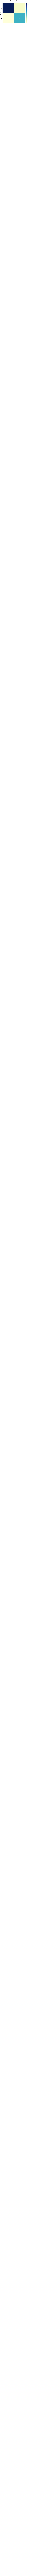

In [51]:
#import the metrics class
from sklearn import metrics
cnf_mrx = metrics.confusion_matrix(y_test, y_pred)
#cnf_mrx
#Confusion matrix for KNN and Ensemble stacking
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_mrx), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.text(0.5, 257.44, 'Predicted label')

In [52]:
#mistakes again

#After realising we made some mistakes, just re-attpempt to optimize hyperparameters
#Defalut model is still same as we built before.
#Struggled with assigning the hyperparameter values gridsearchcv gave
#Should not be put into the validation set. Should go to testset tho.
#after assigning the hyperparameter successfully into the testset, we can see that this
#is better than the model with hyperparameters what we found manually;

In [53]:
#To find the best value
import numpy as np
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
std_slc = StandardScaler()
lr_model = linear_model.LogisticRegression()

pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('lr_model', lr_model)])

In [54]:
X = validation.iloc[:,:-1]
y = validation.iloc[:,-1:]
n_components = list(range(1,X.shape[1]+1,1))
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']

In [55]:
parameters = dict(lr_model__C=C,
                      lr_model__penalty=penalty)

In [56]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)

/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('lr_model', LogisticRegression())]),
             param_grid={'lr_model__C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.9...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'lr_model__penalty': ['l1', 'l2']})

In [57]:
print('Best Penalty:', clf_GS.best_estimator_.get_params()['lr_model__penalty'])
print('Best C:', clf_GS.best_estimator_.get_params()['lr_model__C'])
#print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['lr_model'])

Best Penalty: l2
Best C: 1.7575106248547894

LogisticRegression(C=1.7575106248547894)


In [58]:
#another GridSearchCV task to see the best values of solver and max_iter.
logistic_params = {
    "solver":["saga", "sag", "liblinear", "newton-cg", "lbfgs"],
    "max_iter":[100, 1000, 10000]
}
logistic = LogisticRegression()
tuned_logistic = GridSearchCV(estimator = logistic, param_grid =logistic_params, scoring = "accuracy", n_jobs=-1)
tuned_logistic.fit(x_train, y_train.squeeze())
logisticParams = tuned_logistic.best_params_
print(logisticParams)

/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'max_iter': 100, 'solver': 'liblinear'}


/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [59]:
lr_best_val = LogisticRegression(penalty='l2', solver='liblinear', C = 1.7575106248547894, max_iter=100)
fitted = lr_best_val.fit(x_train_valid, y_train_valid)
print(lr_best_val)

LogisticRegression(C=1.7575106248547894, solver='liblinear')


/Users/min/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
import pandas as pd
import numpy as np
x_train_valid = pd.concat([x_train, x_valid])
y_train_valid = pd.concat([y_train, y_valid])

In [61]:
y_pred = lr_best_val.predict(x_test)

In [62]:
target_names = ['without heartdisease', 'with heartdisease']
print(classification_report(y_test, y_pred, target_names=target_names))

                      precision    recall  f1-score   support

without heartdisease       0.93      0.87      0.90        47
   with heartdisease       0.79      0.88      0.84        26

            accuracy                           0.88        73
           macro avg       0.86      0.88      0.87        73
        weighted avg       0.88      0.88      0.88        73



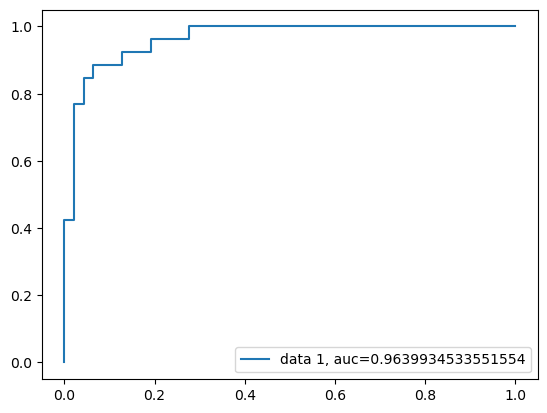

In [63]:
y_pred_proba = lr_best_val.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [64]:
cnf_mrxV = metrics.confusion_matrix(y_test, y_pred)
cnf_mrxV

array([[41,  6],
       [ 3, 23]])

Text(0.5, 257.44, 'Predicted label')

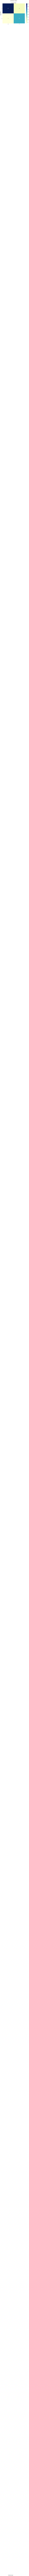

In [65]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_mrxV), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.text(0.5, 257.44, 'Predicted label')